<a href="https://colab.research.google.com/github/Jmazher12/DS4002_Project1/blob/main/SCRIPTS/Project_1_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install and import required packages
! pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

In [3]:
pip install nltk

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
# Read the combined CSV files into DataFrames
df_shogun = pd.read_csv('shogun_reviews_combined.csv')
df_3body = pd.read_csv('3body_reviews_combined.csv')
df_fallout = pd.read_csv('fallout_reviews_combined.csv')
df_mr_mrs_smith = pd.read_csv('mr_mrs_smith_reviews_combined.csv')
df_slow_horses = pd.read_csv('slow_horses_reviews_combined.csv')
df_the_crown = pd.read_csv('the_crown_reviews_combined.csv')
df_the_gilded = pd.read_csv('the_gilded_reviews_combined.csv')
df_the_morning_show = pd.read_csv('the_morning_show_reviews_combined.csv')

# Display a DataFrame
print(df_shogun)
df_shogun.head()

                                               Content         Platform  \
0    In a world this massive, there’s much to find ...  Rotten Tomatoes   
1    The meaning behind each [death] is only augmen...  Rotten Tomatoes   
2    The show manages to translate the classic nove...  Rotten Tomatoes   
3    Shogun had “prestige” written all over it. Yet...  Rotten Tomatoes   
4    If you like exquisitely structured narratives ...  Rotten Tomatoes   
..                                                 ...              ...   
793  I was really looking forward to this show. The...             IMDB   
794  I got 17 minutes into it and turned it off. Th...             IMDB   
795  I was waiting for this so long and here it is ...             IMDB   
796  As a person, I criticize that I am against cha...             IMDB   
797  Really well done job, its a great TV Show... B...             IMDB   

                                                 Title  Rating  
0                                 

Content         Platform Title  \
0  In a world this massive, there’s much to find ...  Rotten Tomatoes   NaN   
1  The meaning behind each [death] is only augmen...  Rotten Tomatoes   NaN   
2  The show manages to translate the classic nove...  Rotten Tomatoes   NaN   
3  Shogun had “prestige” written all over it. Yet...  Rotten Tomatoes   NaN   
4  If you like exquisitely structured narratives ...  Rotten Tomatoes   NaN   

   Rating  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [6]:
# prompt: can you do VADER sentiment analysis on each of the content columns in the data frames above. include negative, positive, neutral, and compound sentiment scores for each review. then take averages of positive, neutral, negative, and command sentiment scores for each showand include in a dataframe.

import pandas as pd
import re
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


def analyze_sentiment(df, content_column):
  """Performs VADER sentiment analysis on a specified column of a DataFrame.

  Args:
      df: The DataFrame containing the content.
      content_column: The name of the column containing the content to analyze.

  Returns:
      A DataFrame with added sentiment columns.
  """

  df['Negative'] = df[content_column].apply(lambda x: analyzer.polarity_scores(str(x))['neg'])
  df['Neutral'] = df[content_column].apply(lambda x: analyzer.polarity_scores(str(x))['neu'])
  df['Positive'] = df[content_column].apply(lambda x: analyzer.polarity_scores(str(x))['pos'])
  df['Compound'] = df[content_column].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
  return df


# Analyze sentiment for each DataFrame and its content column
df_shogun = analyze_sentiment(df_shogun, 'Content')
df_3body = analyze_sentiment(df_3body, 'Content')
df_fallout = analyze_sentiment(df_fallout, 'Content')
df_mr_mrs_smith = analyze_sentiment(df_mr_mrs_smith, 'Content')
df_slow_horses = analyze_sentiment(df_slow_horses, 'Content')
df_the_crown = analyze_sentiment(df_the_crown, 'Content')
df_the_gilded = analyze_sentiment(df_the_gilded, 'Content')
df_the_morning_show = analyze_sentiment(df_the_morning_show, 'Content')


# Calculate average sentiment scores for each show
def calculate_average_sentiment(df):
  """Calculates the average sentiment scores for a DataFrame."""
  return {
      'negative': df['Negative'].mean(),
      'neutral': df['Neutral'].mean(),
      'positive': df['Positive'].mean(),
      'compound': df['Compound'].mean(),
  }

average_sentiments = {
    'Shogun': calculate_average_sentiment(df_shogun),
    '3 Body': calculate_average_sentiment(df_3body),
    'Fallout': calculate_average_sentiment(df_fallout),
    'Mr. & Mrs. Smith': calculate_average_sentiment(df_mr_mrs_smith),
    'Slow Horses': calculate_average_sentiment(df_slow_horses),
    'The Crown': calculate_average_sentiment(df_the_crown),
    'The Gilded Age': calculate_average_sentiment(df_the_gilded),
    'The Morning Show': calculate_average_sentiment(df_the_morning_show),
}


# Create a DataFrame from the average sentiment scores
average_sentiment_df = pd.DataFrame.from_dict(average_sentiments, orient='index')

print(average_sentiment_df)
average_sentiment_df.to_csv('average_sentiment_scores_new.csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                  negative   neutral  positive  compound
Shogun            0.066119  0.783145  0.150717  0.545970
3 Body            0.084948  0.776804  0.138239  0.371488
Fallout           0.062972  0.764109  0.172920  0.677364
Mr. & Mrs. Smith  0.072206  0.773490  0.154311  0.473601
Slow Horses       0.063275  0.762139  0.174612  0.584364
The Crown         0.069536  0.773465  0.156993  0.492834
The Gilded Age    0.074688  0.766382  0.158930  0.455320
The Morning Show  0.067329  0.745900  0.186782  0.515225


In [7]:
df_shogun.head()

Content         Platform Title  \
0  In a world this massive, there’s much to find ...  Rotten Tomatoes   NaN   
1  The meaning behind each [death] is only augmen...  Rotten Tomatoes   NaN   
2  The show manages to translate the classic nove...  Rotten Tomatoes   NaN   
3  Shogun had “prestige” written all over it. Yet...  Rotten Tomatoes   NaN   
4  If you like exquisitely structured narratives ...  Rotten Tomatoes   NaN   

   Rating  Negative  Neutral  Positive  Compound  
0     NaN     0.000    0.791     0.209    0.7003  
1     NaN     0.122    0.878     0.000   -0.5994  
2     NaN     0.000    0.728     0.272    0.8217  
3     NaN     0.000    0.838     0.162    0.7163  
4     NaN     0.000    0.884     0.116    0.3612

In [8]:
analyzer = SentimentIntensityAnalyzer()

# Shogun
review_text = str(df_shogun['Content'])

# Analyze the sentiment
sentiment_score_shogun = analyzer.polarity_scores(review_text)

# Output the sentiment scores
print(sentiment_score_shogun)

{'neg': 0.054, 'neu': 0.871, 'pos': 0.075, 'compound': 0.3597}


In [9]:
analyzer = SentimentIntensityAnalyzer()

# 3 Body
review_text = str(df_3body['Content'])

# Analyze the sentiment
sentiment_score_3body = analyzer.polarity_scores(review_text)

# Output the sentiment scores
print(sentiment_score_3body)

{'neg': 0.08, 'neu': 0.771, 'pos': 0.149, 'compound': 0.895}


In [10]:
analyzer = SentimentIntensityAnalyzer()

# Fallout
review_text = str(df_fallout['Content'])

# Analyze the sentiment
sentiment_score_fallout = analyzer.polarity_scores(review_text)

# Output the sentiment scores
print(sentiment_score_fallout)

{'neg': 0.061, 'neu': 0.742, 'pos': 0.196, 'compound': 0.9621}


In [11]:
analyzer = SentimentIntensityAnalyzer()

# Mr and Mrs Smith
review_text = str(df_mr_mrs_smith['Content'])

# Analyze the sentiment
sentiment_score_mr_mrs_smith = analyzer.polarity_scores(review_text)

# Output the sentiment scores
print(sentiment_score_mr_mrs_smith)

{'neg': 0.034, 'neu': 0.847, 'pos': 0.118, 'compound': 0.8558}


In [12]:
analyzer = SentimentIntensityAnalyzer()

# Slow Horses
review_text = str(df_slow_horses['Content'])

# Analyze the sentiment
sentiment_score_slow_horses = analyzer.polarity_scores(review_text)

# Output the sentiment scores
print(sentiment_score_slow_horses)

{'neg': 0.013, 'neu': 0.798, 'pos': 0.189, 'compound': 0.973}


In [13]:
analyzer = SentimentIntensityAnalyzer()

# The Crown
review_text = str(df_the_crown['Content'])

# Analyze the sentiment
sentiment_score_the_crown = analyzer.polarity_scores(review_text)

# Output the sentiment scores
print(sentiment_score_the_crown)

{'neg': 0.068, 'neu': 0.741, 'pos': 0.191, 'compound': 0.9366}


In [14]:
analyzer = SentimentIntensityAnalyzer()

# The Gilded
review_text = str(df_the_gilded['Content'])

# Analyze the sentiment
sentiment_score_the_gilded = analyzer.polarity_scores(review_text)

# Output the sentiment scores
print(sentiment_score_the_gilded)

{'neg': 0.017, 'neu': 0.823, 'pos': 0.16, 'compound': 0.9404}


In [15]:
analyzer = SentimentIntensityAnalyzer()

# The Morning Show
review_text = str(df_the_morning_show['Content'])

# Analyze the sentiment
sentiment_score_the_morning_show = analyzer.polarity_scores(review_text)

# Output the sentiment scores
print(sentiment_score_the_morning_show)

{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.9231}


Make dataframe of sentiment scores

In [16]:
# Dataframe of sentiment scores for each show
sentiment_scores = [
    {'Nominee': 'Shogun', 'Negative': sentiment_score_shogun['neg'], 'Neutral': sentiment_score_shogun['neu'], 'Positive': sentiment_score_shogun['pos'], 'Compound': sentiment_score_shogun['compound']},
    {'Nominee': '3 Body Problem', 'Negative': sentiment_score_3body['neg'], 'Neutral': sentiment_score_3body['neu'], 'Positive': sentiment_score_3body['pos'], 'Compound': sentiment_score_3body['compound']},
    {'Nominee': 'Fallout', 'Negative': sentiment_score_fallout['neg'], 'Neutral': sentiment_score_fallout['neu'], 'Positive': sentiment_score_fallout['pos'], 'Compound': sentiment_score_fallout['compound']},
    {'Nominee': 'Mr and Mrs Smith', 'Negative': sentiment_score_mr_mrs_smith['neg'], 'Neutral': sentiment_score_mr_mrs_smith['neu'], 'Positive': sentiment_score_mr_mrs_smith['pos'], 'Compound': sentiment_score_mr_mrs_smith['compound']},
    {'Nominee': 'Slow Horses', 'Negative': sentiment_score_slow_horses['neg'], 'Neutral': sentiment_score_slow_horses['neu'], 'Positive': sentiment_score_slow_horses['pos'], 'Compound': sentiment_score_slow_horses['compound']},
    {'Nominee': 'The Crown', 'Negative': sentiment_score_the_crown['neg'], 'Neutral': sentiment_score_the_crown['neu'], 'Positive': sentiment_score_the_crown['pos'], 'Compound': sentiment_score_the_crown['compound']},
    {'Nominee': 'The Gilded Age', 'Negative': sentiment_score_the_gilded['neg'], 'Neutral': sentiment_score_the_gilded['neu'], 'Positive': sentiment_score_the_gilded['pos'], 'Compound': sentiment_score_the_gilded['compound']},
    {'Nominee': 'The Morning Show', 'Negative': sentiment_score_the_morning_show['neg'], 'Neutral': sentiment_score_the_morning_show['neu'], 'Positive': sentiment_score_the_morning_show['pos'], 'Compound': sentiment_score_the_morning_show['compound']}
]

sentiment_scores_df = pd.DataFrame(sentiment_scores)

print(sentiment_scores_df)

            Nominee  Negative  Neutral  Positive  Compound
0            Shogun     0.054    0.871     0.075    0.3597
1    3 Body Problem     0.080    0.771     0.149    0.8950
2           Fallout     0.061    0.742     0.196    0.9621
3  Mr and Mrs Smith     0.034    0.847     0.118    0.8558
4       Slow Horses     0.013    0.798     0.189    0.9730
5         The Crown     0.068    0.741     0.191    0.9366
6    The Gilded Age     0.017    0.823     0.160    0.9404
7  The Morning Show     0.000    0.855     0.145    0.9231


In [17]:
# Save to CSV
sentiment_scores_df.to_csv('sentiment_scores.csv', index=False)

Analysis Graphs

In [18]:
# Read CSV
sentiment_scores_df = pd.read_csv('sentiment_scores.csv')

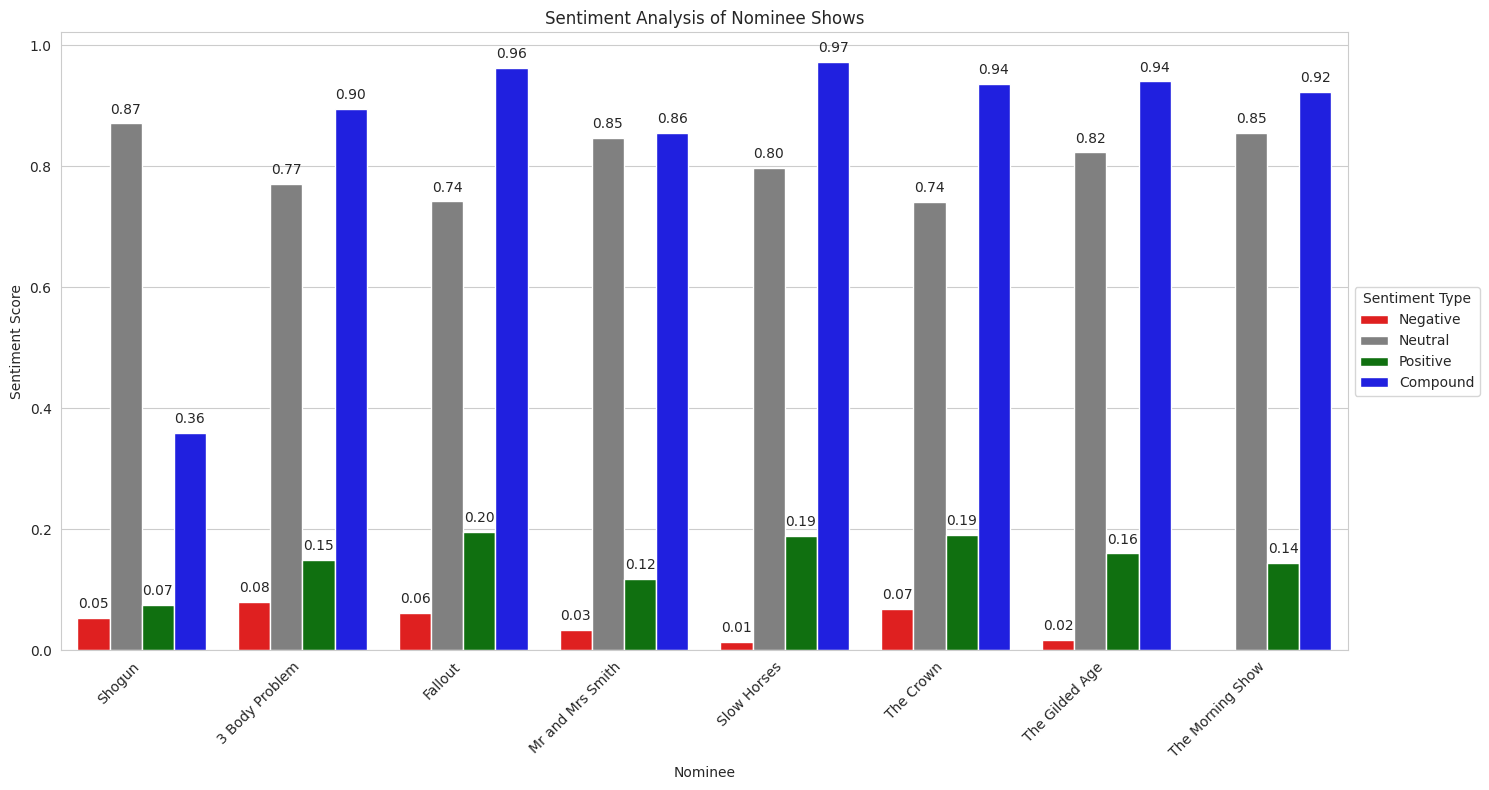

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Barplot of all sentiment scores (positive, negative, neutral, compound) for Emmy-nominated shows

# Analysis Graphs
sentiment_scores_df = pd.read_csv('sentiment_scores.csv')

# Set the style and color palette
sns.set_style("whitegrid")
palette = {'Negative': 'red', 'Neutral': 'grey', 'Positive': 'green', 'Compound': 'blue'}

# Create the bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Nominee', y='value', hue='variable', data=pd.melt(sentiment_scores_df, id_vars=['Nominee'], value_vars=['Negative', 'Neutral', 'Positive', 'Compound']), palette=palette)

# Add labels and title
plt.xlabel('Nominee')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Nominee Shows')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for p in ax.patches:
  if p.get_height() != 0:  # Only annotate bars with non-zero height
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# Add legend
plt.legend(title='Sentiment Type', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()


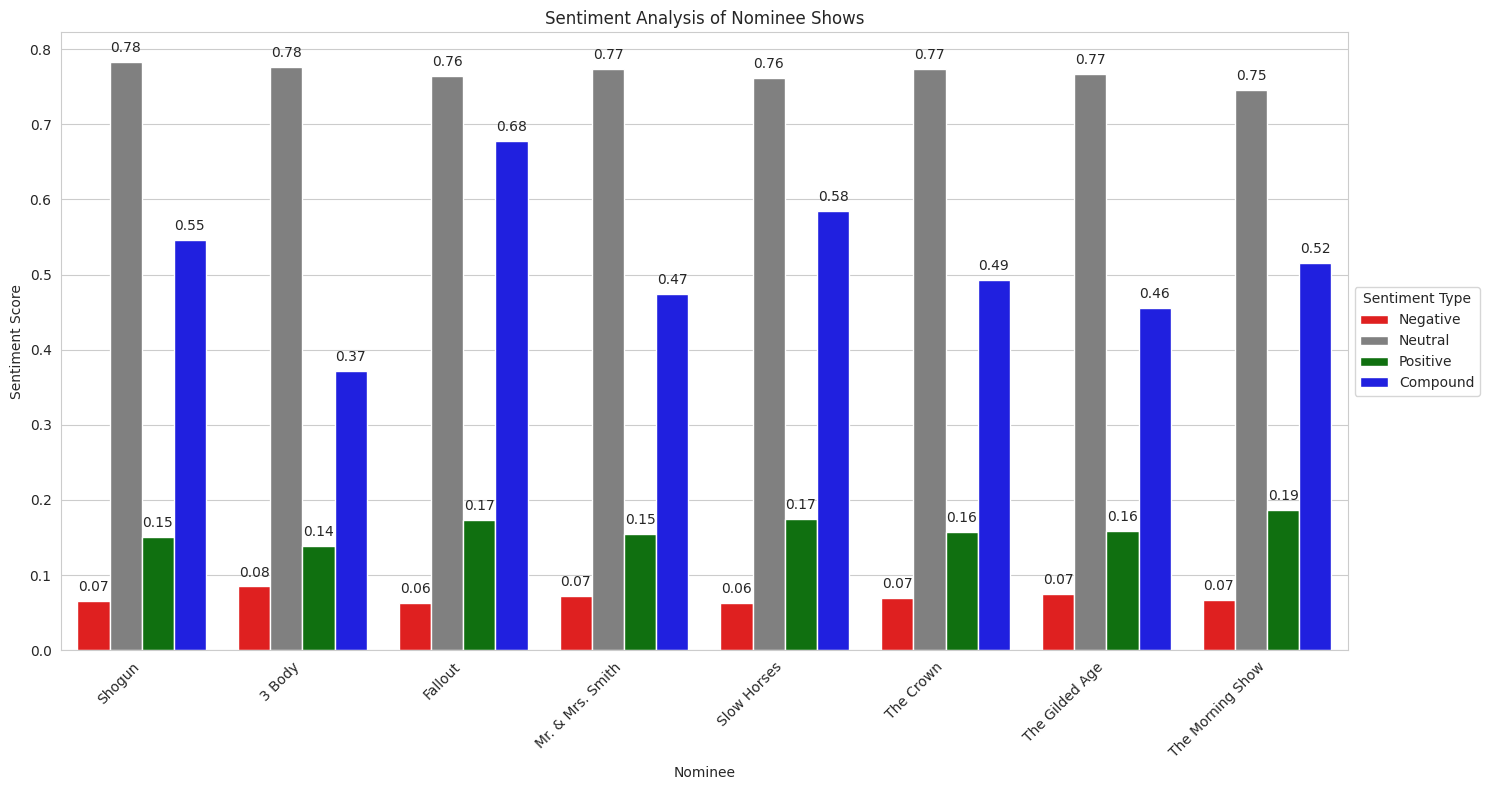

In [20]:
# Barplot for the new analysis data
new_sentiment_scores_df = pd.read_csv('average_sentiment_scores_new.csv')
new_sentiment_scores_df = new_sentiment_scores_df.rename(columns={'Unnamed: 0': 'Nominee', 'negative': 'Negative', 'neutral': 'Neutral', 'positive': 'Positive', 'compound': 'Compound'})

new_sentiment_scores_df.head()

# Analysis Graphs

# Set the style and color palette
sns.set_style("whitegrid")
palette = {'Negative': 'red', 'Neutral': 'grey', 'Positive': 'green', 'Compound': 'blue'}

# Create the bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Nominee', y='value', hue='variable', data=pd.melt(new_sentiment_scores_df, id_vars=['Nominee'], value_vars=['Negative', 'Neutral', 'Positive', 'Compound']), palette=palette)

# Add labels and title
plt.xlabel('Nominee')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Nominee Shows')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for p in ax.patches:
  if p.get_height() != 0:  # Only annotate bars with non-zero height
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# Add legend
plt.legend(title='Sentiment Type', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()


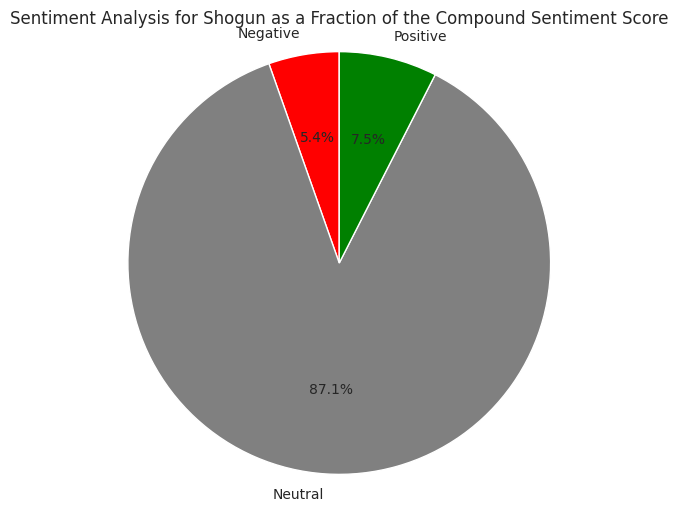

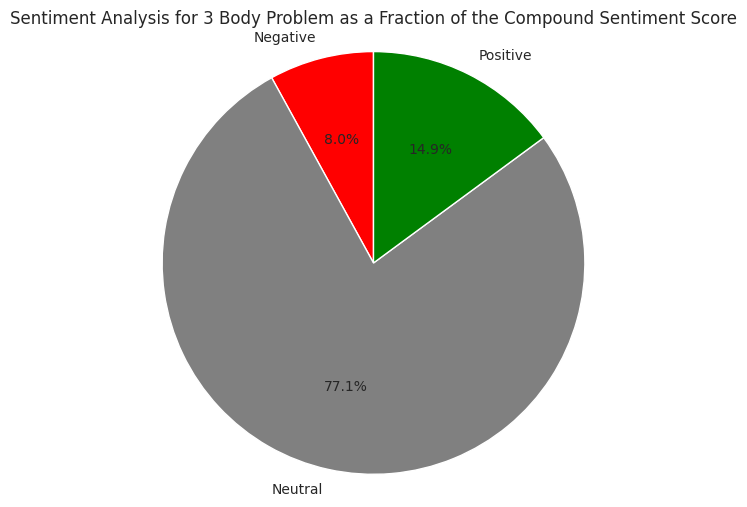

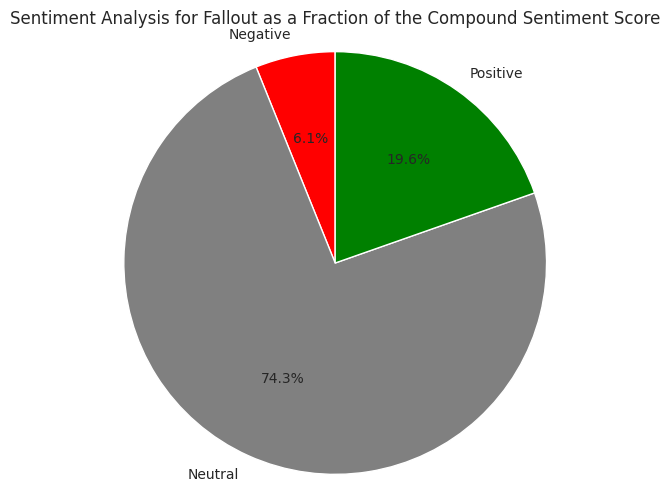

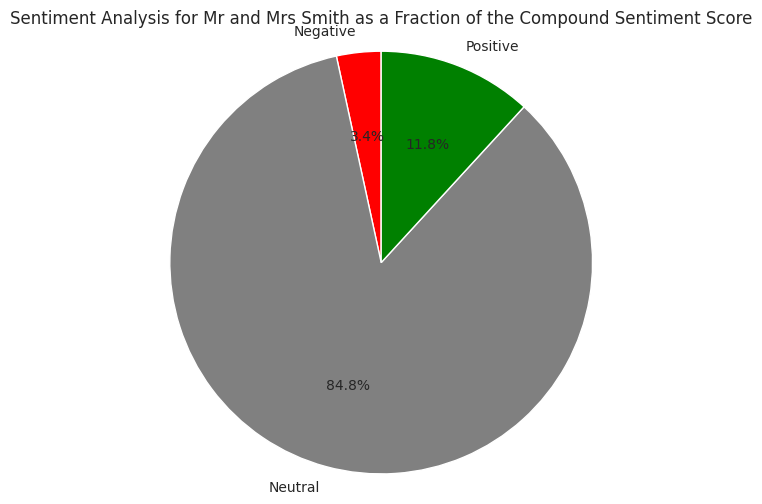

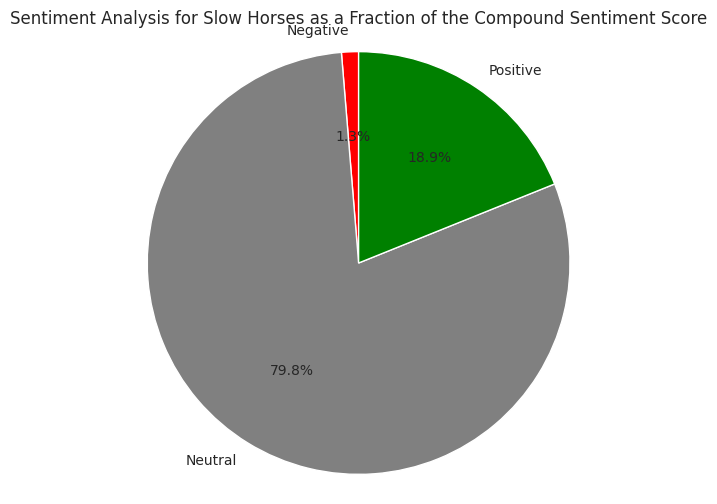

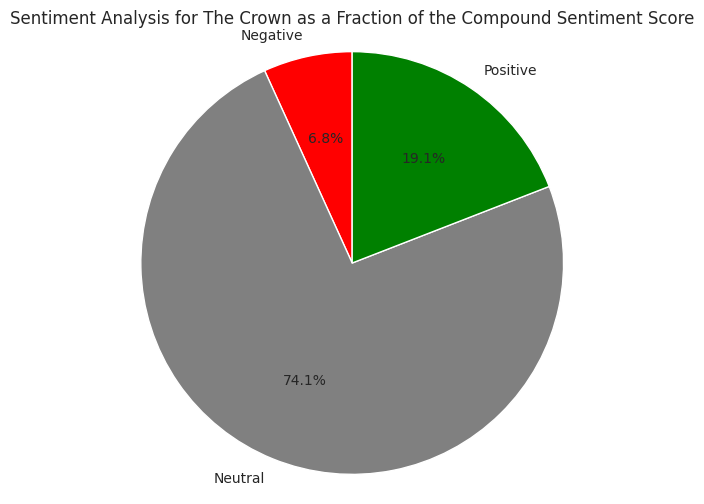

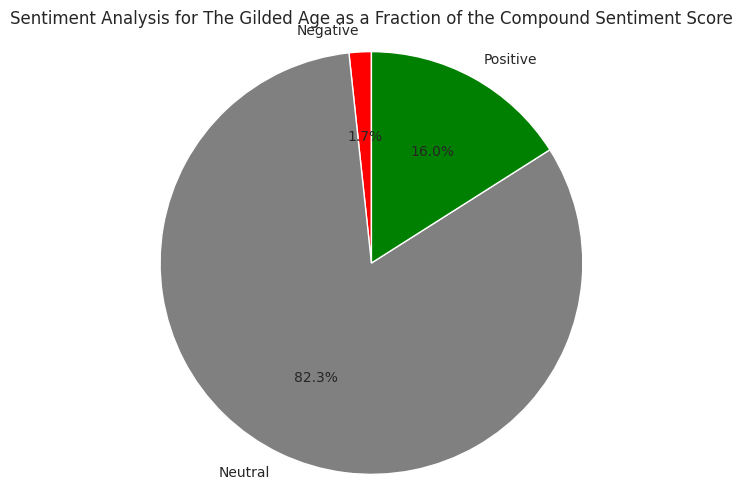

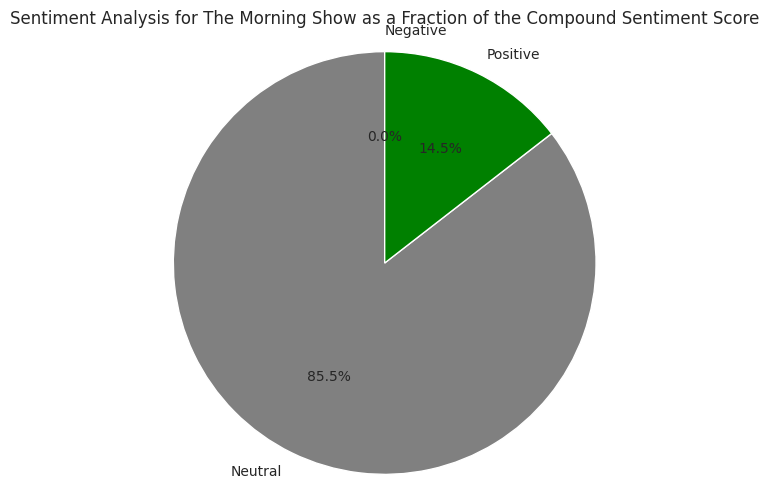

In [21]:
import matplotlib.pyplot as plt
# Pie charts of positive, negative, and neutral sentiment scores as a fraction of their compound score for Emmy-nominated sohws

# Initialize values
for nominee in sentiment_scores_df['Nominee'].unique():
    nominee_data = sentiment_scores_df[sentiment_scores_df['Nominee'] == nominee]
    negative = nominee_data['Negative'].values[0]
    neutral = nominee_data['Neutral'].values[0]
    positive = nominee_data['Positive'].values[0]
    compound = nominee_data['Compound'].values[0]

    # Calculate percentages based on the compound score
    if compound != 0:
        negative_percentage = (negative / compound) * 100
        neutral_percentage = (neutral / compound) * 100
        positive_percentage = (positive / compound) * 100
    else:
        negative_percentage = 0
        neutral_percentage = 0
        positive_percentage = 0

    # Create the pie chart
    labels = ['Negative', 'Neutral', 'Positive']
    sizes = [negative_percentage, neutral_percentage, positive_percentage]
    colors = ['red', 'grey', 'green']

    plt.figure(figsize=(6, 6))  # Set figure size
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'Sentiment Analysis for {nominee} as a Fraction of the Compound Sentiment Score')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    plt.show()


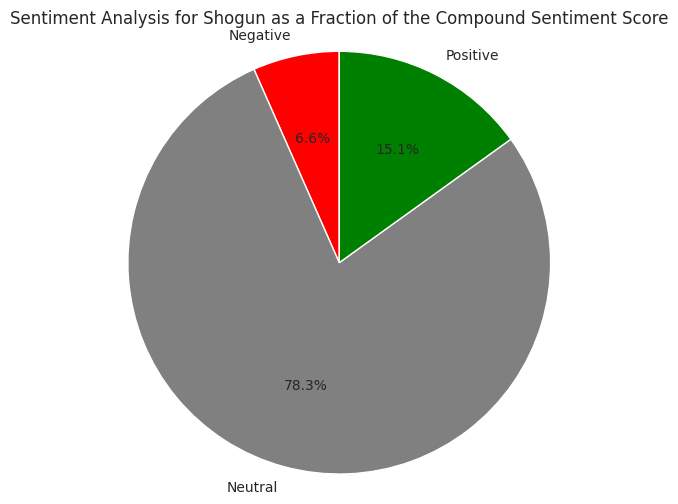

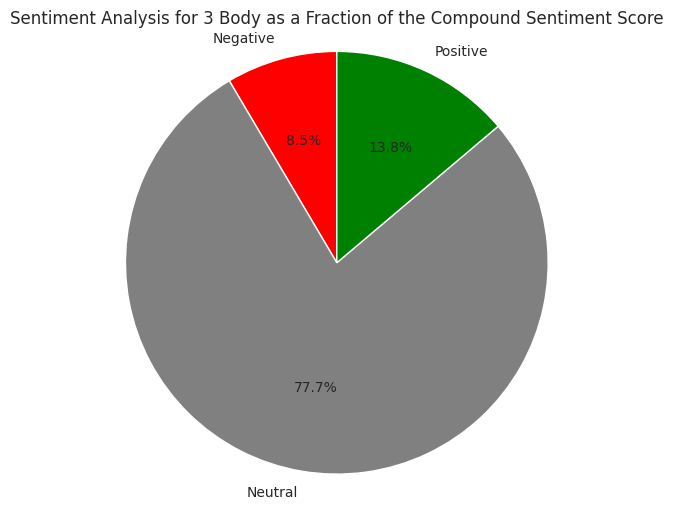

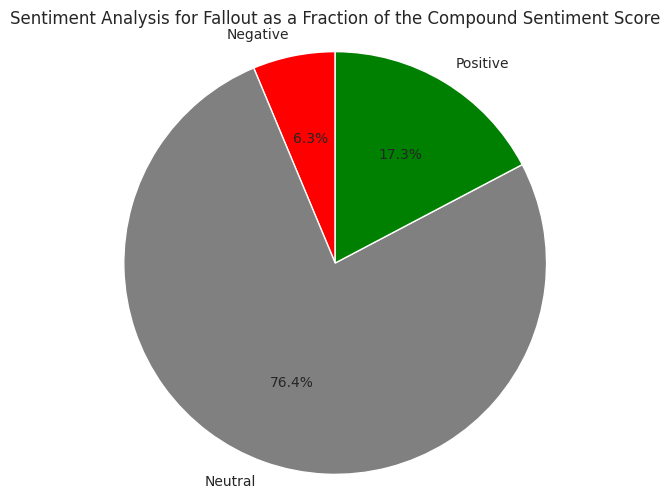

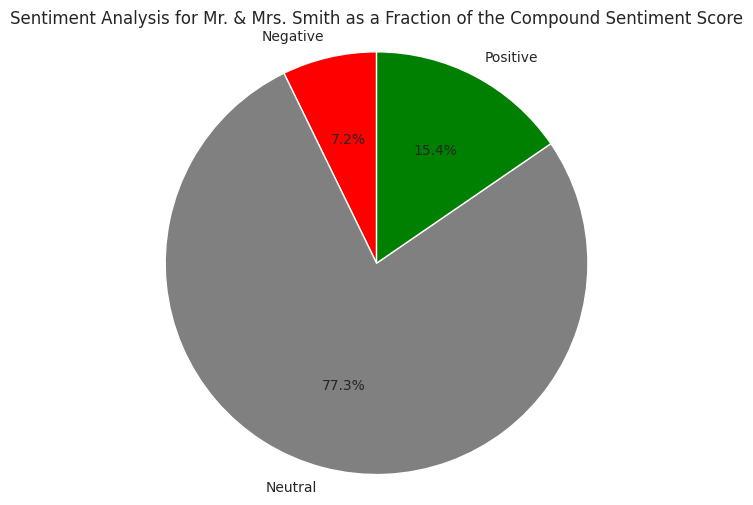

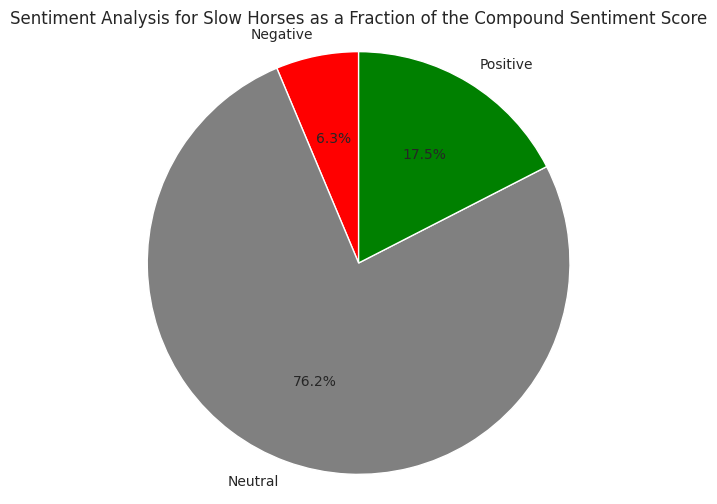

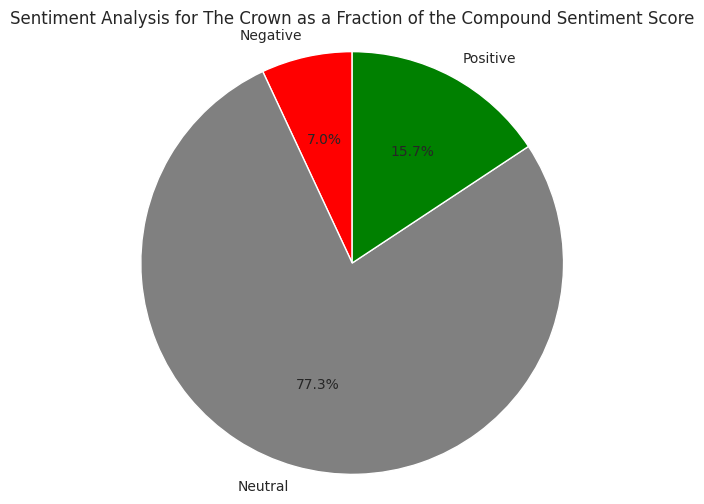

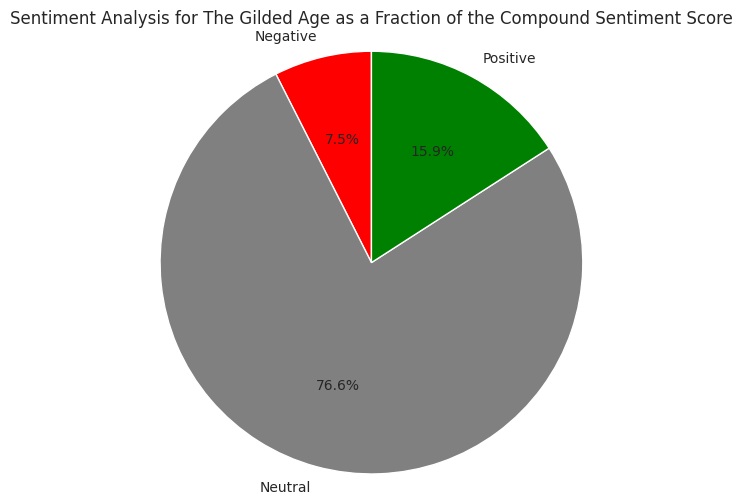

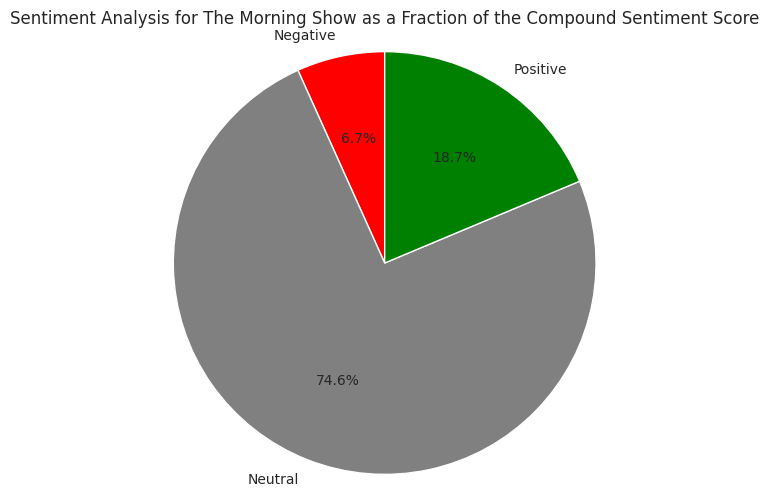

In [22]:
# New Pie charts of positive, negative, and neutral sentiment scores as a fraction of their compound score for Emmy-nominated sohws

# Initialize values
for nominee in new_sentiment_scores_df['Nominee'].unique():
    nominee_data = new_sentiment_scores_df[new_sentiment_scores_df['Nominee'] == nominee]
    negative = nominee_data['Negative'].values[0]
    neutral = nominee_data['Neutral'].values[0]
    positive = nominee_data['Positive'].values[0]
    compound = nominee_data['Compound'].values[0]

    # Calculate percentages based on the compound score
    if compound != 0:
        negative_percentage = (negative / compound) * 100
        neutral_percentage = (neutral / compound) * 100
        positive_percentage = (positive / compound) * 100
    else:
        negative_percentage = 0
        neutral_percentage = 0
        positive_percentage = 0

    # Create the pie chart
    labels = ['Negative', 'Neutral', 'Positive']
    sizes = [negative_percentage, neutral_percentage, positive_percentage]
    colors = ['red', 'grey', 'green']

    plt.figure(figsize=(6, 6))  # Set figure size
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'Sentiment Analysis for {nominee} as a Fraction of the Compound Sentiment Score')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


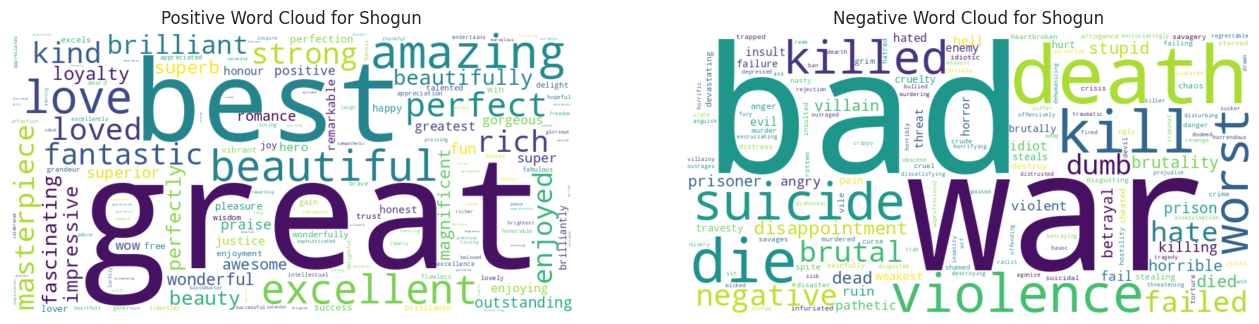

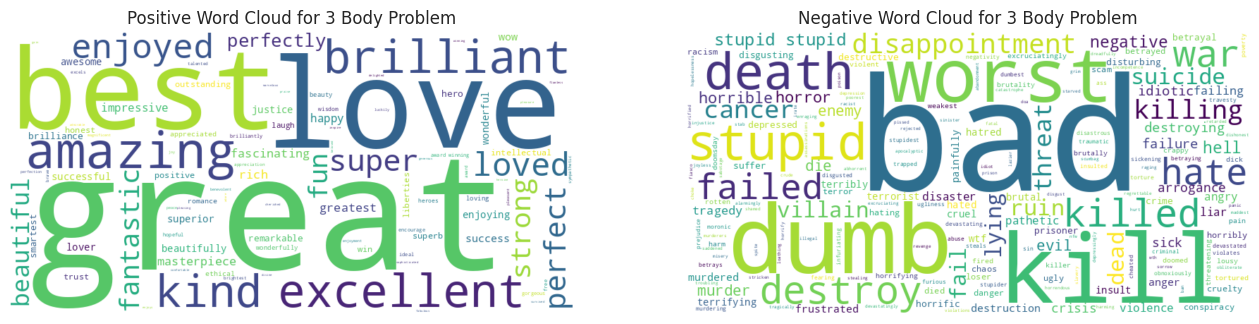

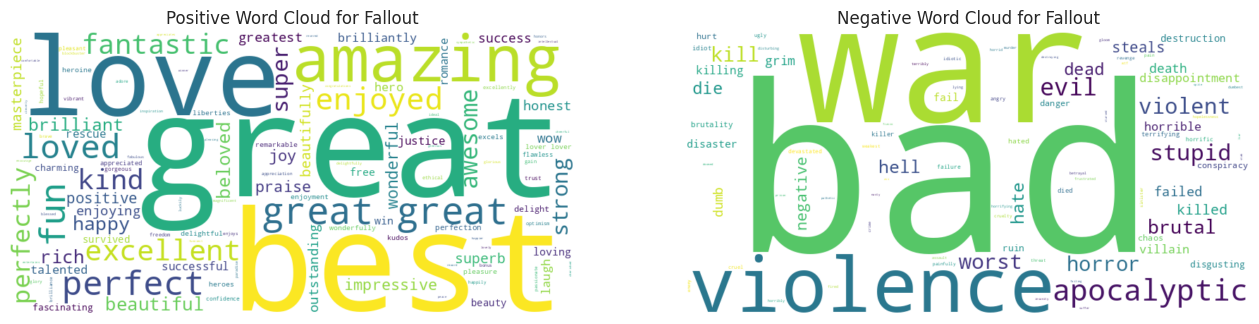

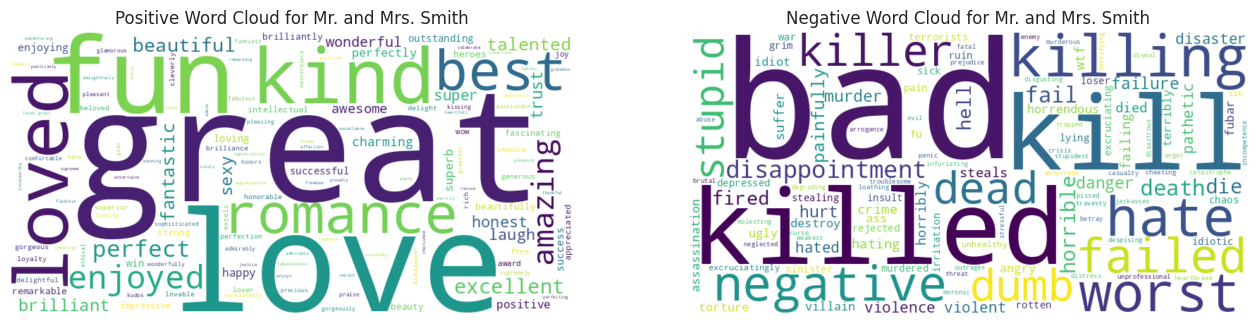

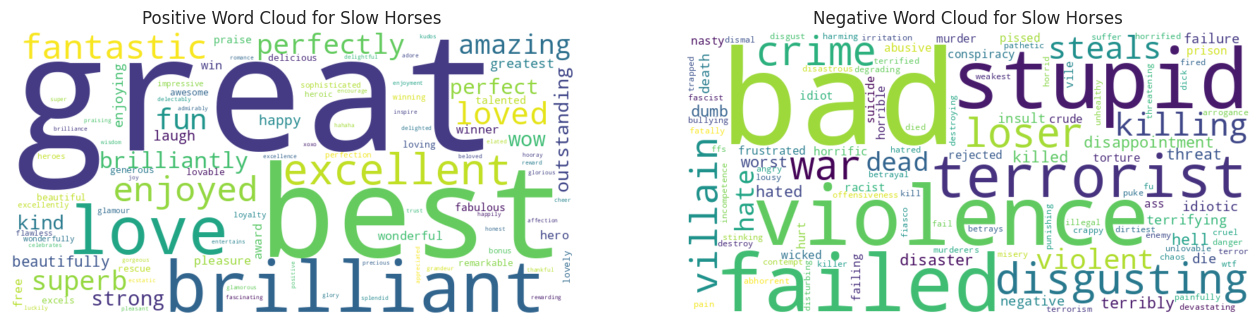

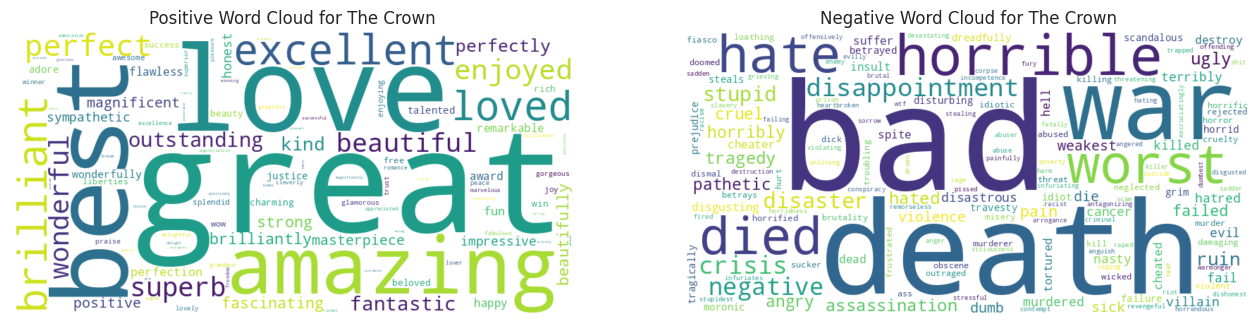

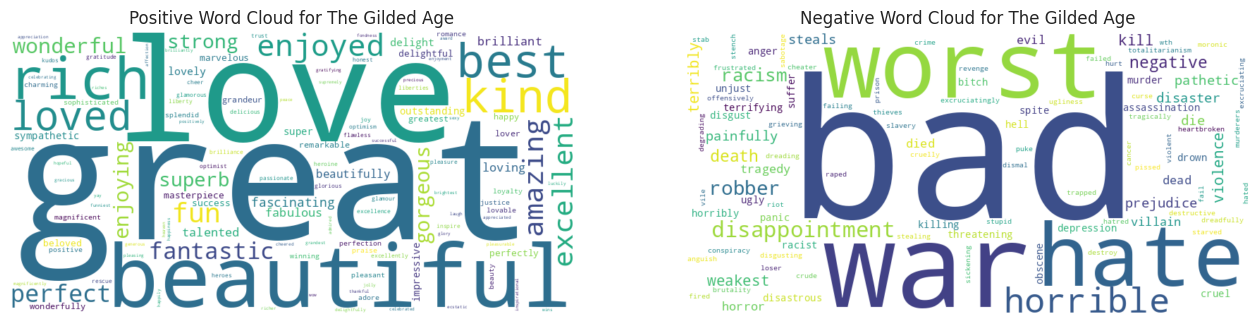

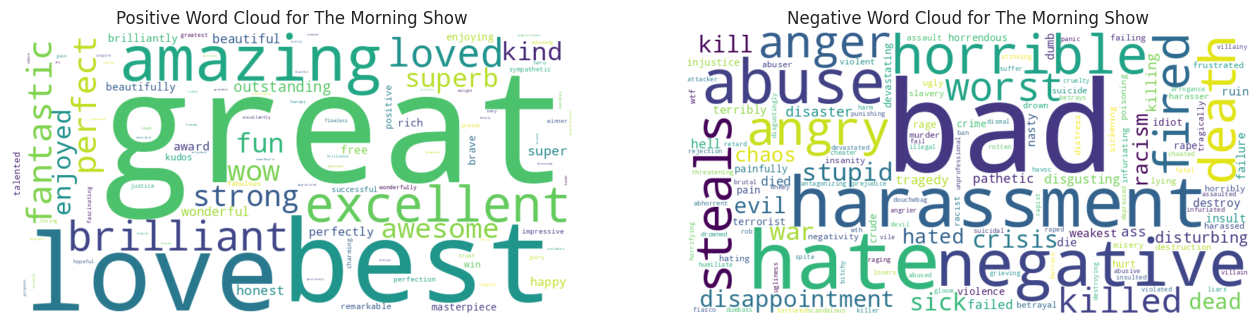

In [23]:
# Positive and Negative Word Clouds for Each Emmy-Nominated Show

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

def generate_wordcloud(df, title):

    # Combine all review content
    all_reviews = ' '.join(df['Content'].astype(str).tolist())

    # Tokenize the reviews
    tokens = word_tokenize(all_reviews)

    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w.lower() for w in tokens if w.isalnum() and w.lower() not in stop_words]

    # Sentiment analysis
    analyzer = SentimentIntensityAnalyzer()
    positive_words = []
    negative_words = []

    for word in filtered_tokens:
        sentiment_score = analyzer.polarity_scores(word)['compound']
        if sentiment_score >= 0.5:  # Consider words with compound score >= 0.5 as positive
            positive_words.append(word)
        elif sentiment_score <= -0.5:  # Consider words with compound score <= -0.5 as negative
            negative_words.append(word)

    # Generate word clouds
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
    negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))

    # Display word clouds
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title(f'Positive Word Cloud for {title}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title(f'Negative Word Cloud for {title}')
    plt.axis('off')

    plt.show()


# Generate word clouds for each show
generate_wordcloud(df_shogun, 'Shogun')
generate_wordcloud(df_3body, '3 Body Problem')
generate_wordcloud(df_fallout, 'Fallout')
generate_wordcloud(df_mr_mrs_smith, 'Mr. and Mrs. Smith')
generate_wordcloud(df_slow_horses, 'Slow Horses')
generate_wordcloud(df_the_crown, 'The Crown')
generate_wordcloud(df_the_gilded, 'The Gilded Age')
generate_wordcloud(df_the_morning_show, 'The Morning Show')


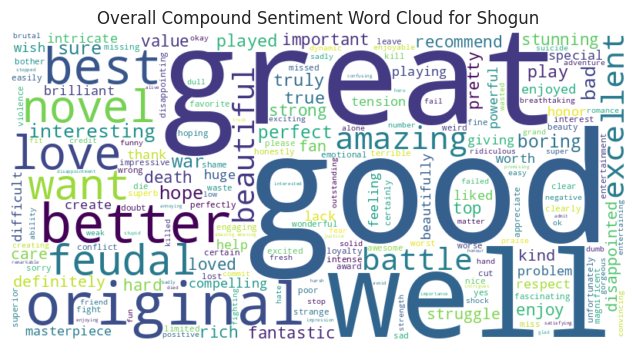

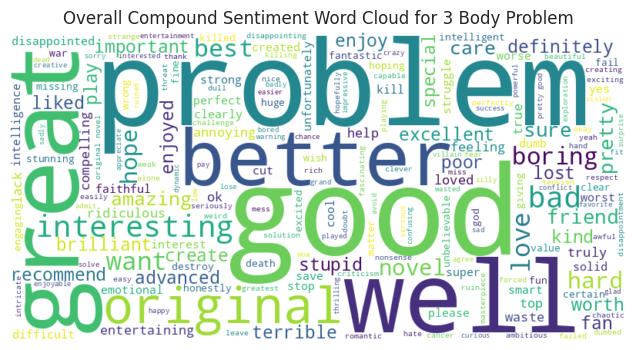

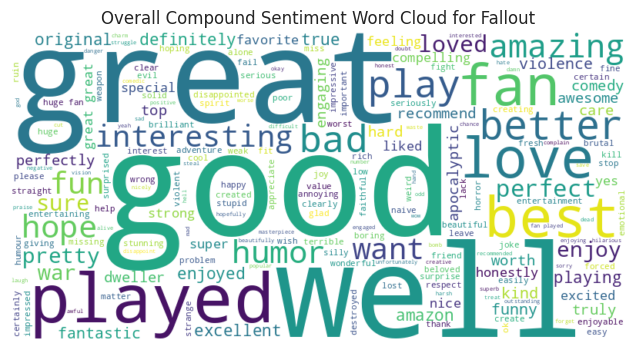

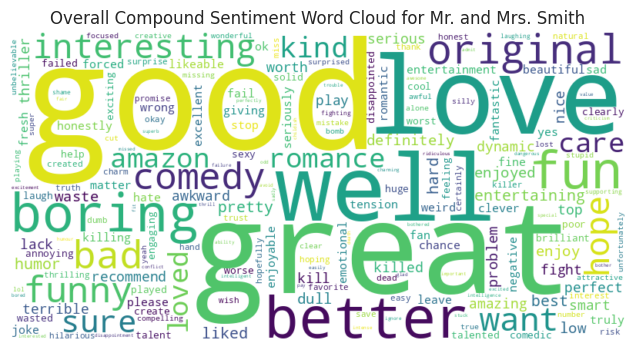

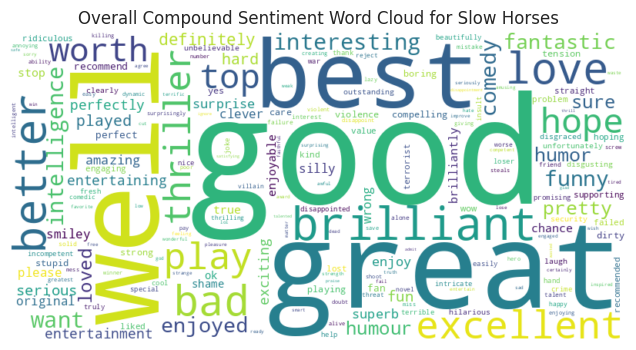

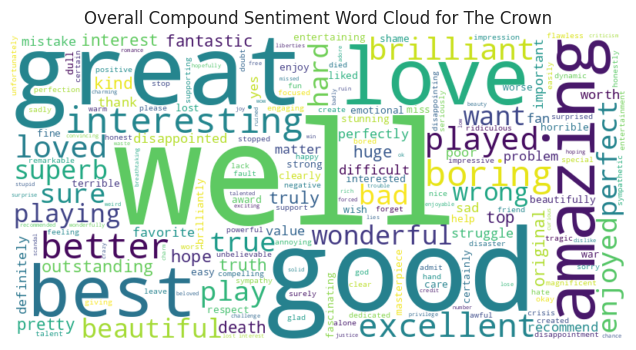

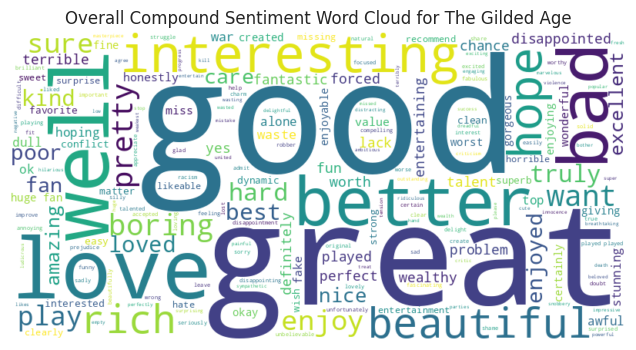

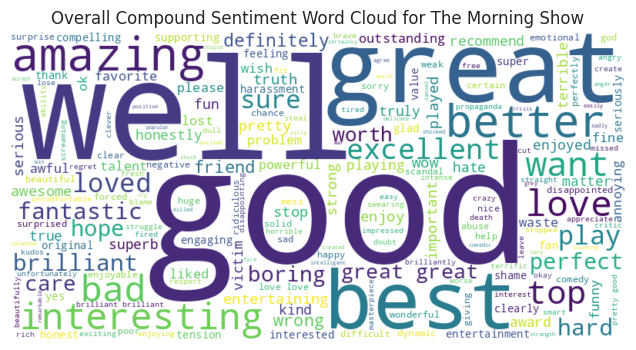

In [24]:
# Overall compound sentiment word clouds for each Emmy-nominated show

def generate_overall_compound_wordcloud(df, title):

    # Combine all review content
    all_reviews = ' '.join(df['Content'].astype(str).tolist())

    # Tokenize the reviews
    tokens = word_tokenize(all_reviews)

    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w.lower() for w in tokens if w.isalnum() and w.lower() not in stop_words]

    # Sentiment analysis
    analyzer = SentimentIntensityAnalyzer()
    all_words = []

    for word in filtered_tokens:
        sentiment_score = analyzer.polarity_scores(word)['compound']
        if sentiment_score != 0:  # Consider words with non-zero compound score
          all_words.append(word)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

    # Display word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Overall Compound Sentiment Word Cloud for {title}')
    plt.axis('off')

    plt.show()


# Generate word clouds for each show
generate_overall_compound_wordcloud(df_shogun, 'Shogun')
generate_overall_compound_wordcloud(df_3body, '3 Body Problem')
generate_overall_compound_wordcloud(df_fallout, 'Fallout')
generate_overall_compound_wordcloud(df_mr_mrs_smith, 'Mr. and Mrs. Smith')
generate_overall_compound_wordcloud(df_slow_horses, 'Slow Horses')
generate_overall_compound_wordcloud(df_the_crown, 'The Crown')
generate_overall_compound_wordcloud(df_the_gilded, 'The Gilded Age')
generate_overall_compound_wordcloud(df_the_morning_show, 'The Morning Show')
